In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('A2Q2Data_train.csv', sep=',',header=None)
data = df.values
print("Shape of data : ", np.shape(data))
X = data[:,:100]
y = data[:, 100]
print("Shape of X : ", np.shape(X))
print("Shape of y : ", np.shape(y))


#test data
df_test=pd.read_csv('A2Q2Data_test.csv', sep=',',header=None)
data_test = df_test.values
print("Shape of test data : ", np.shape(data_test))
X_test = data_test[:,:100]
y_test = data_test[:, 100]
print("Shape of X_test : ", np.shape(X_test))
print("Shape of y_test : ", np.shape(y_test))

Shape of data :  (10000, 101)
Shape of X :  (10000, 100)
Shape of y :  (10000,)
Shape of test data :  (500, 101)
Shape of X_test :  (500, 100)
Shape of y_test :  (500,)


In [ ]:
#w_ML analytical solution
def w_ML_analytical(X, y):
  
  no_of_training_examples = X.shape[0]
  # Adds a column of 1s at the beginning of the X matrix
  X = np.c_[np.ones((len(X), 1)), X]
  y = y.reshape(no_of_training_examples,1)
  w_ML = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))

  return w_ML

In [ ]:
#result is the (101, 1) dimensional parameter vector
w_ML = w_ML_analytical(X, y)
print(np.shape(w_ML))

(101, 1)


In [ ]:
# Adds a column of 1s at the beginning of X matrix
def add_column_of_ones(X):
  X_new = np.c_[np.ones((len(X), 1)), X]
  return X_new

# Initializes the parameter vector w
def initialise_w(X):
  w = np.random.randn(len(X[0])+1, 1)
  return w


# Implements the gradient descent algorithm
def gradient_descent(X,y,learning_rate, number_of_iterations):
    
    y_new = np.reshape(y, (len(y), 1))   
    cost_function_values = []
    X_new = add_column_of_ones(X)
    w = initialise_w(X)
    l = []
    m = len(X)

    
    for i in range(number_of_iterations):
        grads = 2/m * X_new.T.dot(X_new.dot(w) - y_new)
        w = w - learning_rate * grads
        l.append(np.linalg.norm(result-w))
        y_pred = X_new.dot(w)
        cost = 1/(2*len(y))*((y_pred - y)**2) 
        total = 0
        for j in range(len(y)):
            total += cost[j][0] 
        cost_function_values.append(total)


    return (w, cost_function_values, l)

In [ ]:
(w, cost_function_values, d1) = gradient_descent(X,y, 0.03, 5000)

In [ ]:
print(np.linalg.norm(w-result))

0.01792570649139613


Text(0, 0.5, 'Cost')

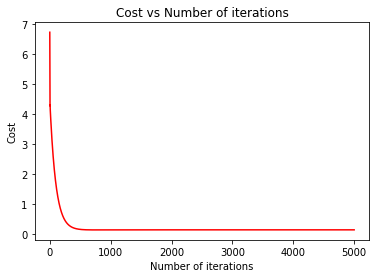

In [ ]:
plt.plot(np.arange(1,5000),cost_function_values[1:], color = 'red')
plt.title('Cost vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

Text(0, 0.5, '||W_t - W_ml||')

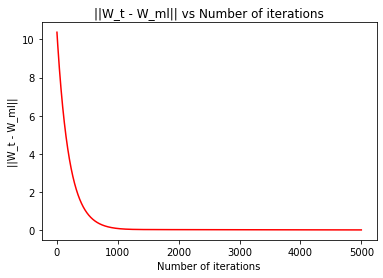

In [ ]:
plt.plot(np.arange(1,5000),d1[1:], color = 'red')
plt.title('||W_t - W_ml|| vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('||W_t - W_ml||')

In [ ]:
# this function generates mini batches
def mini_batch_generation(data, batch_size):
  
  all_the_mini_batches = []
  # Adds a column of 1s at the beginning of the data matrix
  data_matrix = np.c_[np.ones((len(data), 1)), data]
  # Shuffles rows of the data matrix
  np.random.shuffle(data_matrix)
  number_of_minibatches = data_matrix.shape[0] // batch_size

  for i in range(number_of_minibatches):
    current_mini_batch = data_matrix[i * batch_size:(i + 1)*batch_size, :]
    X_current_mini_batch = current_mini_batch[:, :-1]
    Y_current_mini_batch = current_mini_batch[:, -1].reshape((-1, 1))
    all_the_mini_batches.append((X_current_mini_batch, Y_current_mini_batch))

  return all_the_mini_batches
  

In [ ]:
# Implements the mini-batch gradient descent algorithm
def mini_batch_gradient_descent(data, learning_rate, batch_size, number_of_iterations):
  
  w = initialise_w(data[:, :-1])
  cost_function_values = []
  l = []
  
  for i in range(number_of_iterations):
    mini_batches = mini_batch_generation(data, batch_size)
    for mini_batch in mini_batches:
      X_new, y_new = mini_batch
      m = len(X_new)
      grads = 2/m * X_new.T.dot(X_new.dot(w) - y_new)
      w = w - learning_rate * grads
      l.append(np.linalg.norm(result-w))
      y_pred = X_new.dot(w)
      cost = 1/(2*len(y_new))*((y_pred - y_new)**2)
      total = 0
      for j in range(len(y_new)):
        total += cost[j][0] 
      cost_function_values.append(total)

  return (w, cost_function_values, l)

In [ ]:
(w, cost_function_values, d2) = mini_batch_gradient_descent(data, 0.01, 100, 500)

In [ ]:
print(np.linalg.norm(w-result))

0.04404551411179389


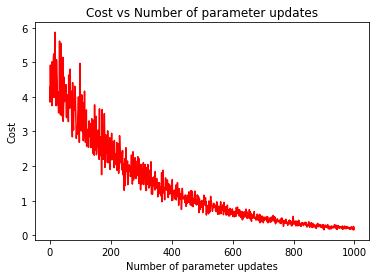

In [ ]:
plt.plot(cost_function_values[:1000], color = 'red')
plt.title('Cost vs Number of parameter updates')
plt.xlabel("Number of parameter updates")
plt.ylabel("Cost")
plt.show()

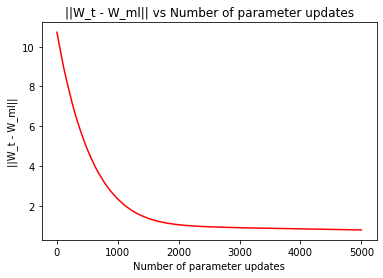

In [ ]:
plt.plot(d2[:5000], color = 'red')
plt.title('||W_t - W_ml|| vs Number of parameter updates')
plt.xlabel("Number of parameter updates")
plt.ylabel("||W_t - W_ml||")
plt.show()

In [ ]:
# Question 2 : (iv)

X_data = np.c_[np.ones((len(X), 1)), X]
y_data = np.reshape(y, (len(y), 1))
print(np.shape(X_data))
print(np.shape(y_data))

#training data
X_data_train = X_data[: 9000, :]
y_data_train = y_data[: 9000, :]
print(np.shape(X_data_train))
print(np.shape(y_data_train))

#validation data
X_data_validation = X_data[9000: , :]
y_data_validation = y_data[9000: , :]
print(np.shape(X_data_validation))
print(np.shape(y_data_validation))

(10000, 101)
(10000, 1)
(9000, 101)
(9000, 1)
(1000, 101)
(1000, 1)


In [ ]:
# ridge regression cost function
def ridge_cost_func(X_data,y_data,w,lamda):
    
    m = len(y_data) 
    J = 0
    
    h = X_data @ w
    J_reg = (lamda / (2*m)) * np.sum(np.square(w))
    J = float((1./(2*m)) * (h - y_data).T @ (h - y_data)) + J_reg

    return J 

In [ ]:
# ridge regression gradient descent
def ridge_gradient_descent(X_data,y_data, learning_rate,lamda,num_of_iterations):
     
    m = np.size(y_data)
    w = np.random.randn(len(X_data[0]), 1)
    cost_function_values = []

    for i in range(num_of_iterations):

        h = np.dot(X_data,w)
        
        w = w - learning_rate * (1/m)* (  (X_data.T @ (h-y_data)) + lamda * w )
           
        cost_function_values.append(ridge_cost_func(X_data,y_data,w,lamda))
              
    return (w, cost_function_values)

In [ ]:
(w, cost_function_values) = ridge_gradient_descent(X_data_train,y_data_train, learning_rate = 0.03,lamda = 10,num_of_iterations=2000)

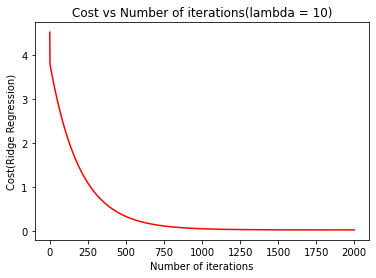

In [ ]:
plt.plot(cost_function_values, color = 'red')
plt.title('Cost vs Number of iterations(lambda = 10)')
plt.xlabel("Number of iterations")
plt.ylabel("Cost(Ridge Regression)")
plt.show()

In [ ]:
# error calculation
def error(X,y,w):

    m = np.size(y)
    h = X @ w
    J = float((1./(2*m)) * (h - y).T @ (h - y))

    return J

In [ ]:
# code for finding the best lambda
errors = []

for lamda in np.linspace(0.0, 15.0, num=31):
  
  (w, cost_function_values) = ridge_gradient_descent(X_data_train,y_data_train, learning_rate = 0.03, lamda = lamda,num_of_iterations=2000)
  res = error(X_data_validation, y_data_validation, w)
  errors.append(res)


Text(0, 0.5, 'Validation Error')

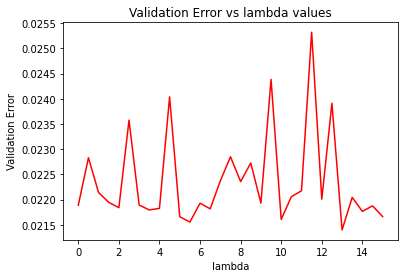

In [ ]:
plt.plot(np.linspace(0.0, 15.0, num=31),errors, color = 'red')
plt.title('Validation Error vs lambda values')
plt.xlabel('lambda')
plt.ylabel('Validation Error')

In [ ]:
# w_R for lambda = 6
(w_R, cost_function_values) = ridge_gradient_descent(X_data_train,y_data_train, learning_rate = 0.03,lamda = 6,num_of_iterations=2000)

In [ ]:
X_test_data = np.c_[np.ones((len(X_test), 1)), X_test]
y_test_data = np.reshape(y_test, (len(y_test), 1))

print(np.shape(X_test_data))
print(np.shape(y_test_data))

(500, 101)
(500, 1)


In [ ]:
#test error of w_R
print(error(X_test_data, y_test_data, w_R))

0.18387421006338558


In [ ]:
#test error of w_ML
print(error(X_test_data, y_test_data, w_ML))

0.18537575114434596
